In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("../")
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pickle
import json
import numpy as np
from features import merge_entries, prepare_entry
from utills import chunker, cartesian_product
import glob
from tqdm.auto import trange, tqdm
import pickle
import av_analysis as av
import pandas as pd

In [3]:
import shap
%matplotlib inline

In [4]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.style as style
from matplotlib import rcParams
%matplotlib notebook
style.use('seaborn-whitegrid')


In [5]:
import seaborn as sns

# Load Models and Data

In [6]:
analysis = av.AVAnalysis('../temp_data/pan/experiment_data.p', vector_path_prefix='../temp_data/pan/')

In [6]:
# analysis = av.AVAnalysis('../temp_data/pan/model.p', vector_path_prefix='../temp_data/pan/')

In [7]:
gpt2_docs = av.load_generated_docs('../temp_data/gpt2/human_gpt2_preprocessed*', limit_ai_size=11)

Read: 120
Avg Lengths:
Human 1:    4957.70
Human 2:    4920.78
AI 1:       4931.18
AI 2:       4690.65


In [18]:
(4931.18 + 4690.65)/2

4810.915

In [8]:
gpt3_docs = av.load_generated_docs('../temp_data/gpt3_new/new_human_gpt3_preprocessed.jsonl')

Read: 106
Avg Lengths:
Human 1:    4941.38
Human 2:    4923.18
AI 1:       4824.05
AI 2:       4758.64


In [19]:
(4824.05 + 4758.64)/2

4791.345

In [9]:
chatgpt_docs = av.load_generated_docs('../temp_data/chatgpt/human_chatgpt_preprocessed.jsonl')

Read: 95
Avg Lengths:
Human 1:    4973.69
Human 2:    4941.02
AI 1:       4876.98
AI 2:       4773.77


In [20]:
(4876.98 + 4773.77)/2

4825.375

# Apply AV Model

In [10]:
gpt2_results = analysis.apply_model(gpt2_docs)

Human - Human:          0.823
Human - AI:             0.718
AI - AI:                0.780
AI - AI (Diff Author):  0.642


In [11]:
gpt3_results = analysis.apply_model(gpt3_docs)

Human - Human:          0.811
Human - AI:             0.299
AI - AI:                0.973
AI - AI (Diff Author):  0.953


In [13]:
chatgpt_results = analysis.apply_model(chatgpt_docs)

Human - Human:          0.800
Human - AI:             0.232
AI - AI:                0.984
AI - AI (Diff Author):  0.977


In [14]:
all_docs_dict = {
    'human_1': (gpt3_docs[0], gpt3_docs[4]),
    'human_2': (gpt3_docs[1], gpt3_docs[4]),
    'chatgpt_1': (chatgpt_docs[2],chatgpt_docs[4]),
    'chatgpt_2': (chatgpt_docs[3], chatgpt_docs[4]),
    'gpt3_1': (gpt3_docs[2], gpt3_docs[4]),
    'gpt3_2': (gpt3_docs[3], gpt3_docs[4]),
    'gpt2_1': (gpt2_docs[2], gpt2_docs[4]),
    'gpt2_2': (gpt2_docs[3], gpt2_docs[4])
}

In [15]:
key_roots = ['human', 'gpt2', 'gpt3', 'chatgpt']

In [16]:
res = analysis.apply_model_multiple_sets(all_docs_dict, key_roots)

Number of common docs: 78
human - human: 0.793
gpt2 - human: 0.753
gpt2 - gpt2: 0.801
gpt3 - human: 0.343
gpt3 - gpt2: 0.278
gpt3 - gpt3: 0.970
chatgpt - human: 0.256
chatgpt - gpt2: 0.152
chatgpt - gpt3: 0.977
chatgpt - chatgpt: 0.984


<IPython.core.display.Javascript object>


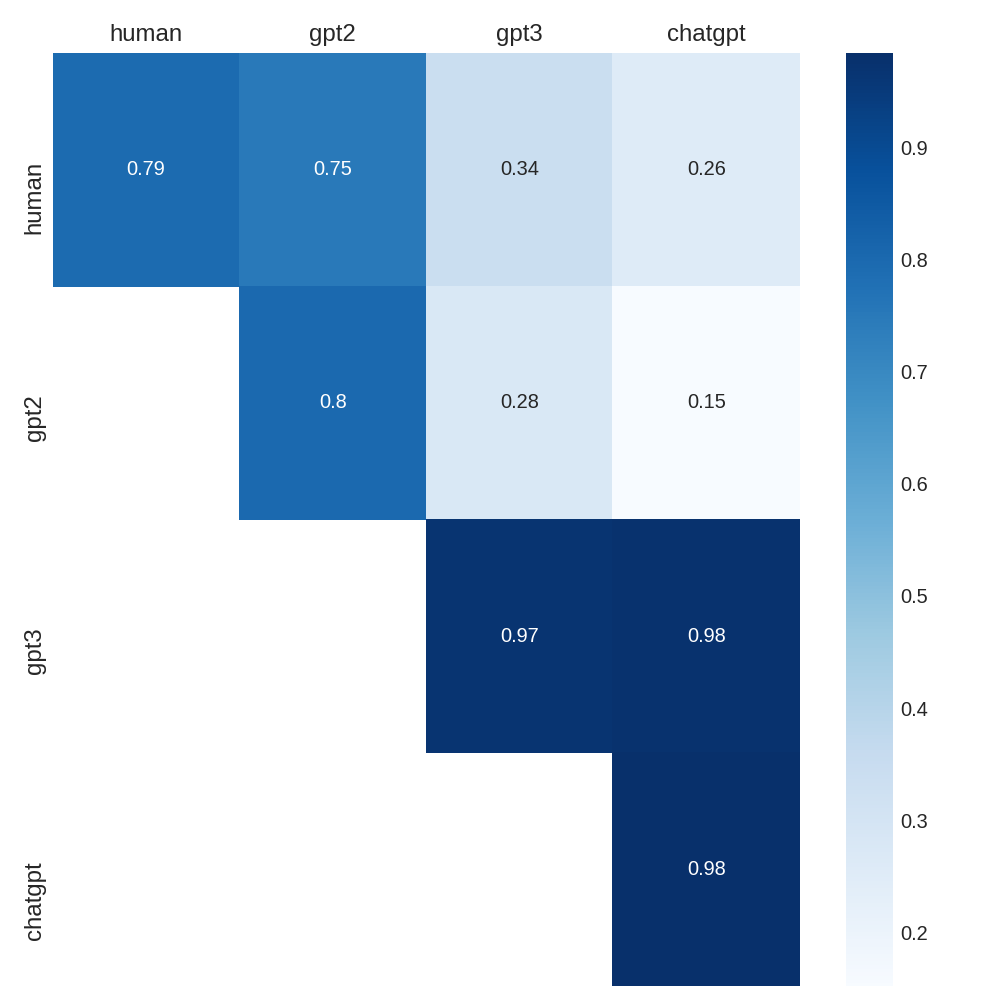

In [17]:
_ = analysis.plot_multiple_set_result(res, key_roots)

# Feature Analysis

<IPython.core.display.Javascript object>


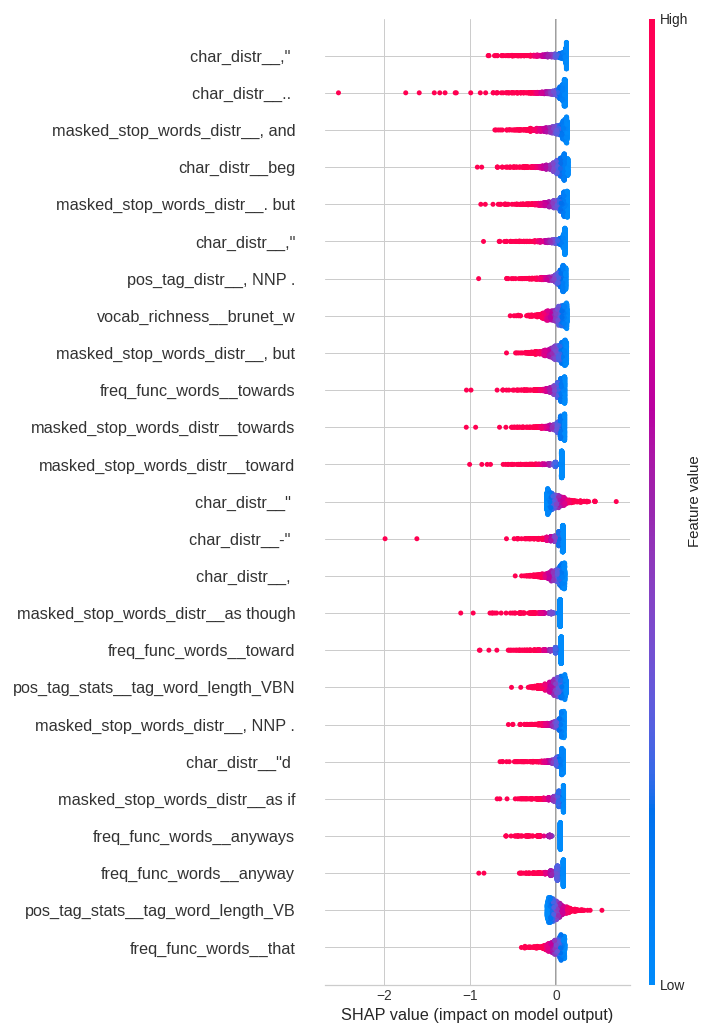

In [22]:
analysis.plot_shap_summary_av_model()

In [23]:
shap_summaries_gpt2 = analysis.get_all_shap_summary(gpt2_docs, 'gpt2')
shap_summaries_gpt3 = analysis.get_all_shap_summary(gpt3_docs, 'gpt3')
shap_summaries_chatgpt = analysis.get_all_shap_summary(chatgpt_docs, 'chatgpt')

<IPython.core.display.Javascript object>


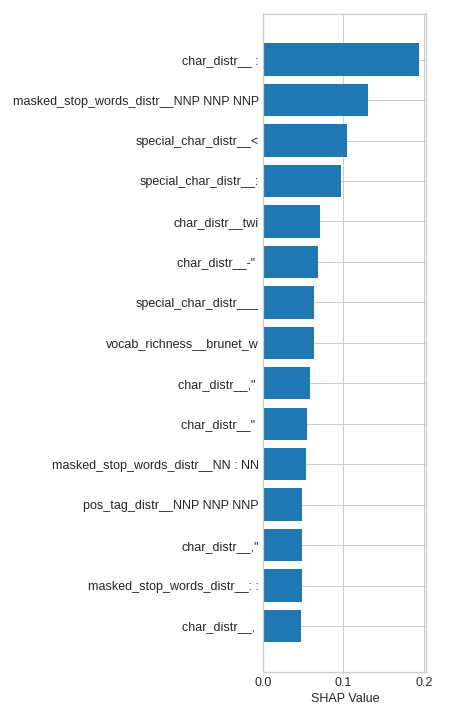

In [44]:
analysis.plot_shap_summary_single_comparison(shap_summaries_gpt2['human-gpt2'])

<IPython.core.display.Javascript object>


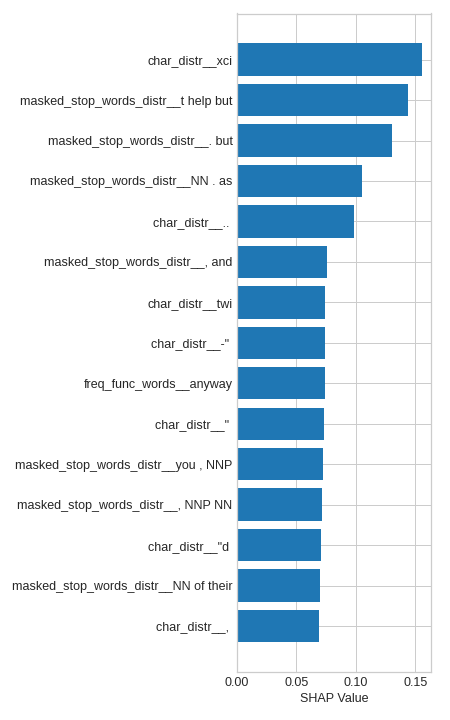

In [45]:
analysis.plot_shap_summary_single_comparison(shap_summaries_gpt3['human-gpt3'])

<IPython.core.display.Javascript object>


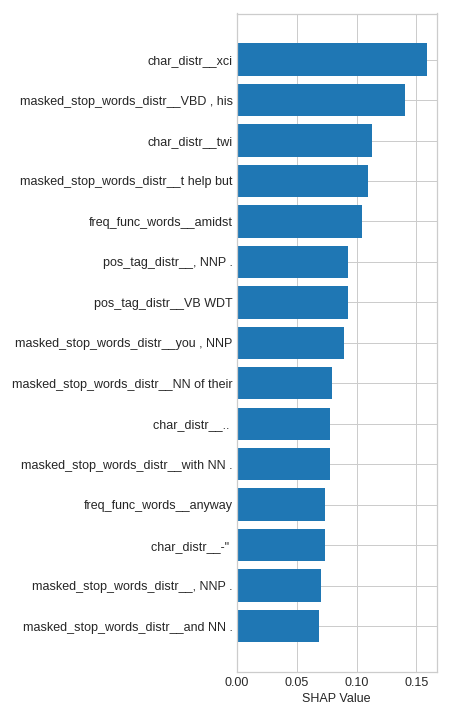

In [47]:
analysis.plot_shap_summary_single_comparison(shap_summaries_chatgpt['human-chatgpt'])

<IPython.core.display.Javascript object>


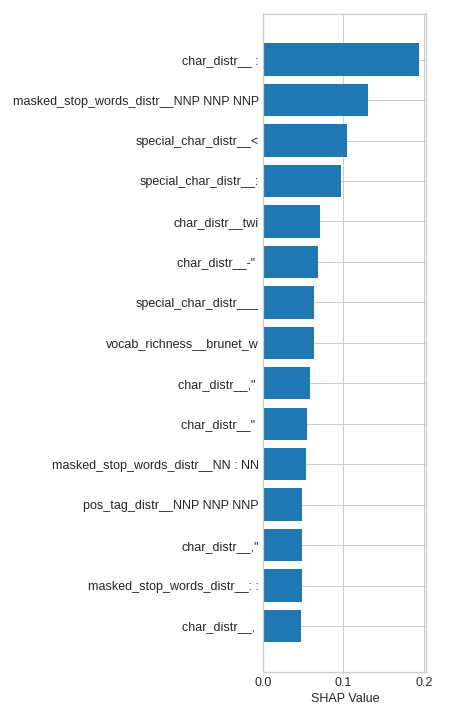

In [25]:
analysis.plot_shap_summary_single_comparison(shap_summaries_gpt2['human-gpt2'])

In [120]:
shap_values_gpt3 = analysis.get_all_shap_values(gpt3_docs)

In [121]:
shap_summaries_df = analysis.get_all_shap_summary(gpt3_docs, 'gpt3')

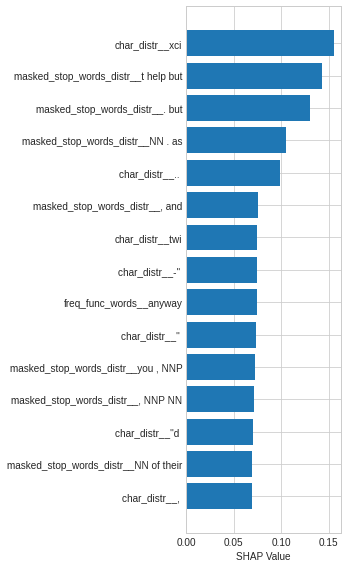

In [122]:
analysis.plot_shap_summary_single_comparison(shap_summaries_df['human-gpt3'])

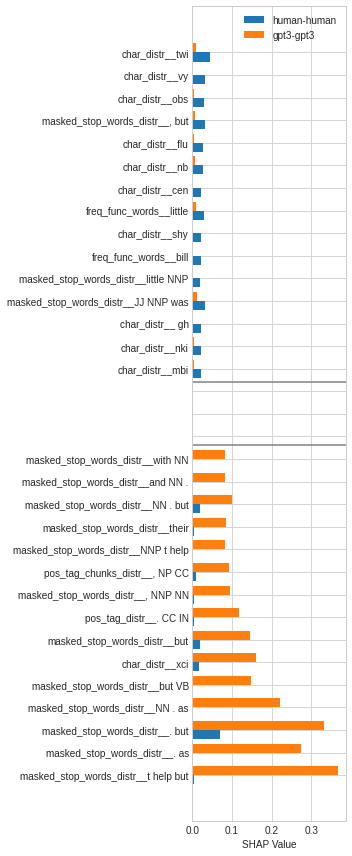

In [133]:
analysis.plot_shap_summary_two_comparisons(shap_summaries_df, 'human-human', 'gpt3-gpt3')

In [124]:
shap_summaries_chatgpt_df = analysis.get_all_shap_summary(chatgpt_docs, 'chatgpt')

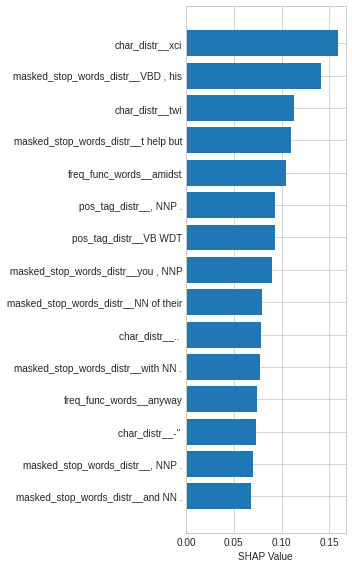

In [125]:
analysis.plot_shap_summary_single_comparison(shap_summaries_chatgpt_df['human-chatgpt'])

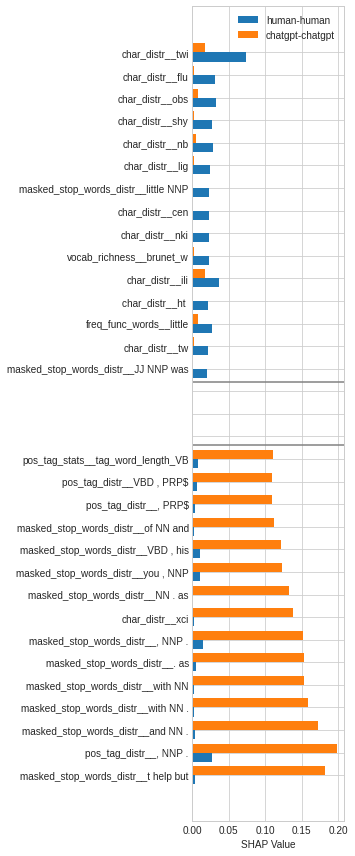

In [132]:
analysis.plot_shap_summary_two_comparisons(shap_summaries_chatgpt_df, 'human-human', 'chatgpt-chatgpt')

In [181]:
n = min(len(gpt2_docs[0]), len(gpt2_docs[2]))
print(n)
human_gpt2_shap_values = analysis.get_shap_values(gpt2_docs[2][:n], gpt2_docs[2][:n])

27


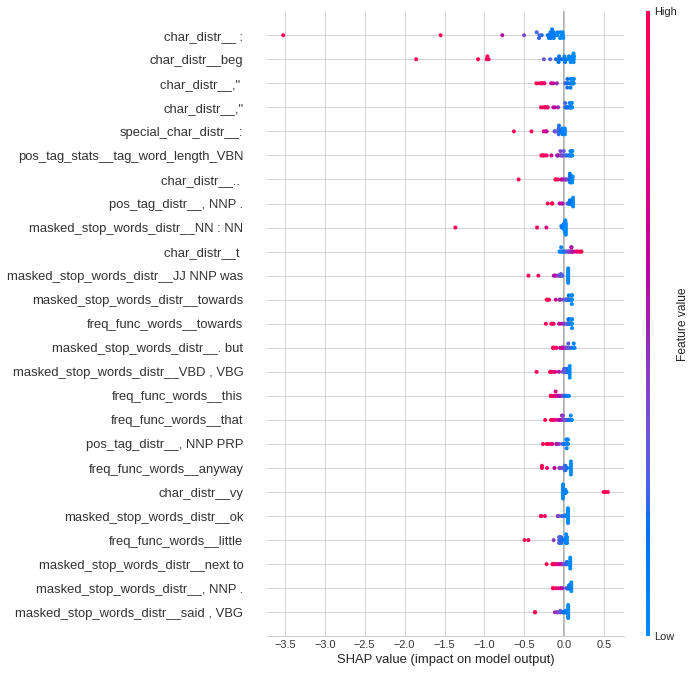

<Figure size 432x288 with 0 Axes>

In [182]:
analysis.plot_shap_summary(gpt2_docs[0][:n], gpt2_docs[2][:n])

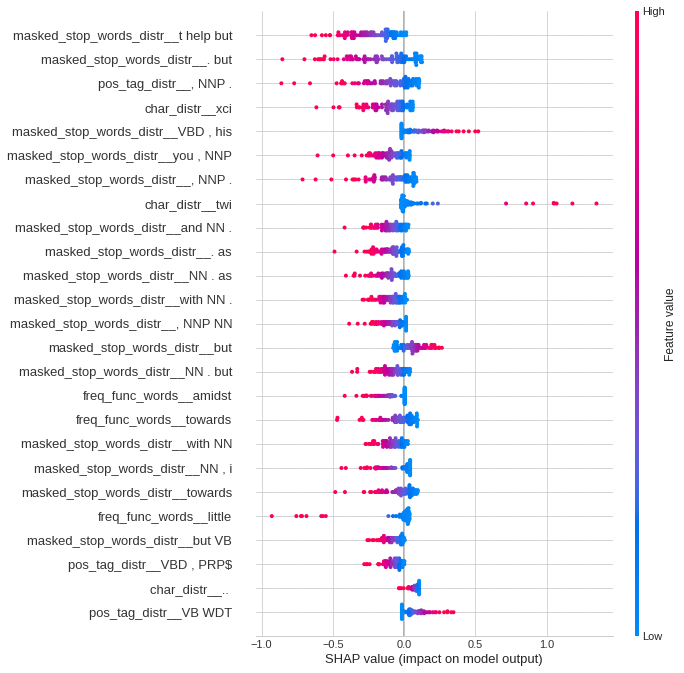

<Figure size 432x288 with 0 Axes>

In [128]:
analysis.plot_shap_summary(chatgpt_docs[2][:n], gpt3_docs[2][:n])

In [27]:
human_docs_1, human_docs_2, ai_docs_1, ai_docs_2, pair_ids = gpt2_docs